## Modelos não-supervisionados

#### Agrupamento (_clustering_)
Na aula de hoje falaremos sobre o terceiro tipo geral de problema, além da regressão e classificação: os problemas de agrupamento. As técnicas de _clustering_ são em geral técnicas de **aprendizado não-supervisionado**, apesar de também existirem técnicas de clustering supervisionadas.

A principal diferença para os problemas de regressão e classificação nesse caso se dá pela **ausência de variável resposta** - não estamos tentando estimar um valor ou prever uma classe, e sim encontrar grupos distintos no conjunto de variáveis explicativas. Há técnicas onde é necessário especificar a quantidade de _clusters_ a serem encontrados, e outras onde a quantidade de clusters é determinada pela própria técnica.

É importante notar que **clustering** não é sinônimo de **não-supervisionado**. O primeiro significa em termos gerais uma característica do _problema_ - queremos encontrar grupos distintos -, enquanto o segundo caracteriza a _técnica_ pela ausência de variável resposta.

Modelos de clustering são muito úteis para gestão de carteira de negócios, como segmentação de uma base de clientes em diferentes perfis, análise de cesta de mercado (_market basket analysis_), detecção de anomalias e até processamento de texto.

#### K-Means
O algoritmo K-Means é uma das técnicas mais básicas utilizadas pra clusterização. A ideia é ajustar $k$ pontos arbitrários (centroides) no espaço das variáveis explicativas, de forma que cada centroide representa um cluster e uma amostra é atribuída ao cluster cujo centroide está mais próximo. O algoritmo em seguida é iterativamente otimizado tomando novas posições para cada centroide, definidas como o ponto que minimiza a variância intra-cluster. Esta etapa pode ser muito custosa, mas há uma propriedade matemática que nos permite calcular este ponto tomando as médias de cada coordenada das amostras, o que garante melhor escalabilidade ao algoritmo.

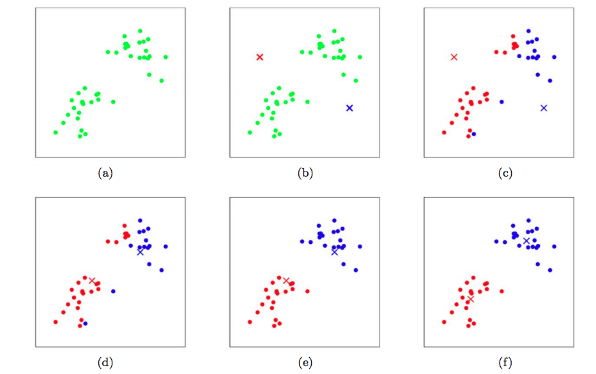

Os centroides iniciais podem ser arbitrariamente inicializados, tomando pontos aleatórios ou amostras como centroides.

O K-Means é, fundamentalmente, um algoritmo de partição: estamos "fatiando" o espaço das variáveis em $k$ regiões. Ele _pode ser_ (e é) utilizado para clusterização, mas seu objetivo não é encontrar clusters e sim particionar o espaço em regiões que minimizam a **inércia**, definido como uma espécie de variância dentro do cluster de forma muito análoga ao MSE:

$$\large\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$
<br>
<br>

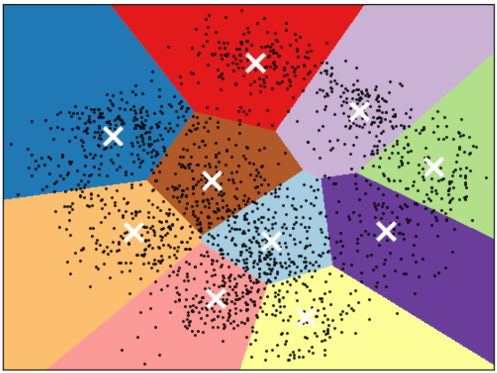

##### Comportamentos inesperados
Algoritmos de clusterização são, de forma geral, um pouco mais complexos e abstratos do que as técnicas supervisionadas. No caso do K-Means, existem algumas limitações devido ao jeito que é construído. Elas são, principalmente:
- Necessidade de saber de antemão o número $k$ de clusters;
- Incapacidade de lidar com dados distribuídos anisotropicamente (clusters não-esféricos)
- Dificuldade de encontrar mínimo local ótimo

Vamos visualizar alguns problemas do algoritmo:

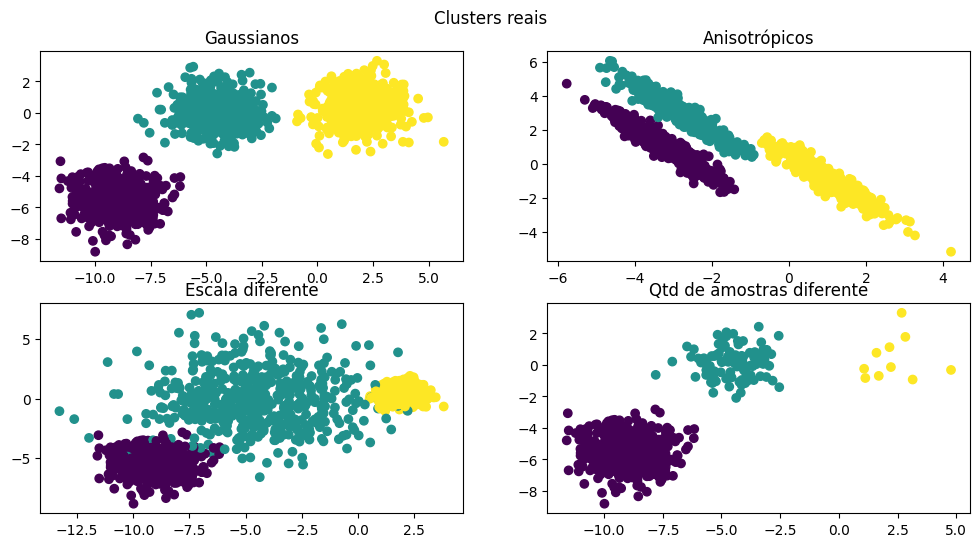

In [1]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotrópicos
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Escalas diferentes
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Qtd de amostras diferente
y_filtered = [0]*500+[1]*100+[2]*10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Gaussianos")
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotrópicos")
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Escala diferente")
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Qtd de amostras diferente")
plt.suptitle("Clusters reais").set_y(0.95)
plt.show()

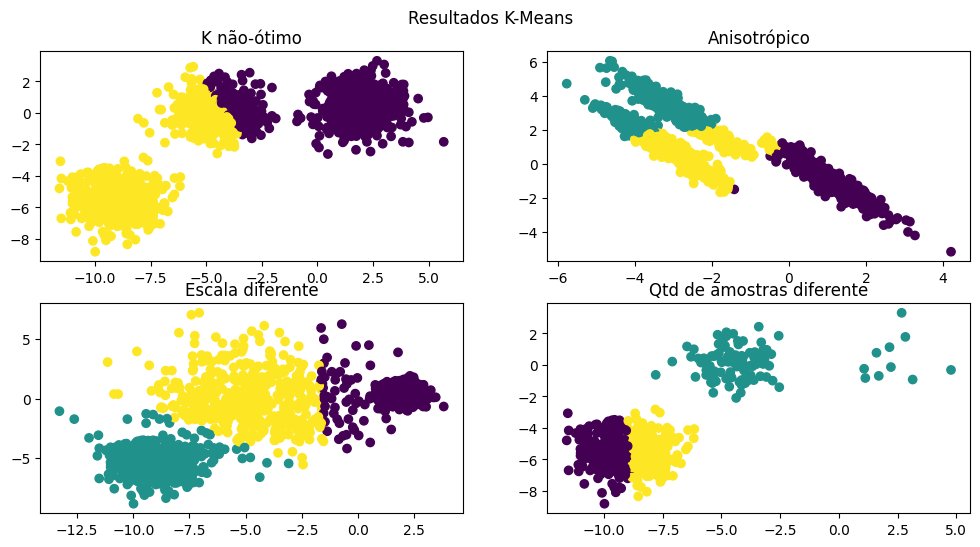

In [2]:
from sklearn.cluster import KMeans
common_params = {"n_init": "auto", "random_state": random_state}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("K não-ótimo")
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotrópico")
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Escala diferente")
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Qtd de amostras diferente")
plt.suptitle("Resultados K-Means").set_y(0.95)
plt.show()

Vamos testar o K-Means em dados reais! Para isso, utilizaremos o dataset _Online Retail_, que contém dados de uma loja online inglesa de presentes, e faremos uma segmentação de perfil de clientes.

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
online_retail = fetch_ucirepo(id=352)
df = pd.concat([online_retail.data.features, online_retail.data.targets], axis=1)

In [4]:
# Formato do dataframe
# 541909 linhas e 6 colunas
df.shape

(541909, 6)

In [5]:
# Printando um pedaço do dataset
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [6]:
# Verificando qtd de nulos
df.isna().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Verificando se há duplicidades
df.duplicated().sum()

6007

In [8]:
# Removendo nulos na coluna de id
df.dropna(subset=['CustomerID'], inplace=True)

In [9]:
# Removendo duplicidades
df.drop_duplicates(inplace=True)

In [10]:
print(df.shape)
print(df.isna().sum())
print(df.duplicated().sum())

(401528, 6)
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
0


In [11]:
# Qtd de clientes diferentes
df['CustomerID'].nunique()

4372

Vamos construir uma segmentação baseada em três métricas de um cliente comumente chamadas de RFM - _recency_, _frequency_ e _monetary_. Estas três métricas representam respectivamente a _recência_ da última compra, isto é, o tempo entre a última compra do cliente e a data atual (máxima do dataset), a _frequência_ geral de compras do cliente, isto é, o quão recorrente são as compras, e o _valor monetário_ das compras. Vamos construir essas variáveis!

##### Trabalhando com datas
A coluna "InvoiceDate" representa a data de compra. Precisaremos efetuar manipulações aritméticas nessa coluna, e para isso é interessante usar o formato _datetime_ do pandas.

In [12]:
df['data_compra'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [13]:
# Calculando qtd de dias desde a última compra
ultimo_dia = df['data_compra'].max()
df['qtd_dias_ultima_compra'] = (ultimo_dia - df['data_compra']).apply(lambda x: x.days)

<Axes: >

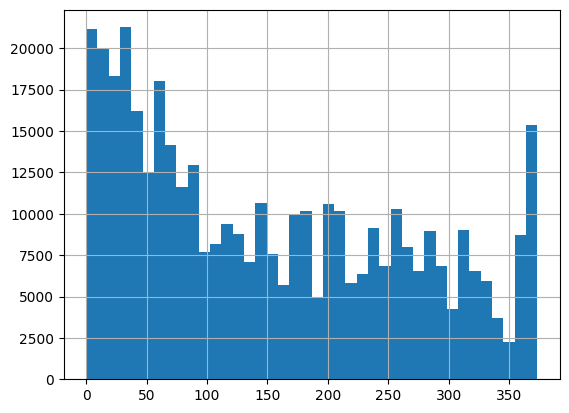

In [14]:
df['qtd_dias_ultima_compra'].hist(bins=40)

In [15]:
# Criando coluna de valor total
# qtd * valor_unitario
df['vlr_total'] = df['Quantity']*df['UnitPrice']

In [16]:
# Agrupando e criando coluna de frequência
df_grouped = df.groupby('CustomerID').agg({'vlr_total':np.sum,
                                           'qtd_dias_ultima_compra':min,
                                           'InvoiceDate':lambda x: len(set(x))}).reset_index()
df_grouped.columns = ['CustomerID', 'vlr_total', 'recencia', 'frequencia']

In [17]:
from sklearn.model_selection import train_test_split

# Separando em treino e teste
df_train, df_test = train_test_split(df_grouped, test_size=0.3, random_state=1312)

In [18]:
from sklearn.preprocessing import StandardScaler

# Padronizando variáveis
scaler = StandardScaler()
model_cols = ['vlr_total_norm', 'recencia_norm', 'frequencia_norm']
df_train[model_cols] = scaler.fit_transform(df_train[[c.replace('_norm', '') for c in model_cols]])

<Axes: xlabel='vlr_total_norm', ylabel='frequencia_norm'>

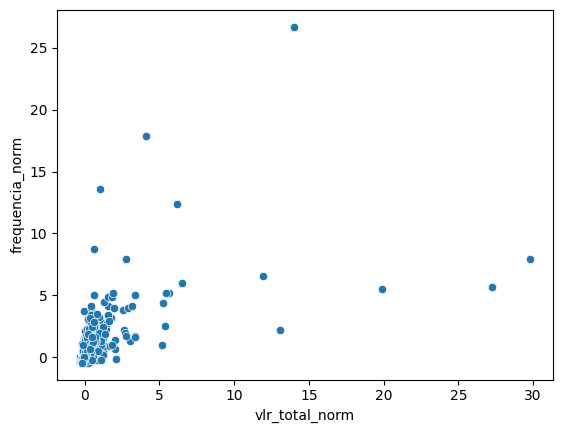

In [19]:
import seaborn as sns

# Visualizando dados padronizados
sns.scatterplot(df_train, x='vlr_total_norm', y='frequencia_norm')

Temos algumas amostras que estão bem isoladas! Amostras muito distante das restantes, com valores muito diferentes da média, normalmente são chamadas de _outliers_. Para muitas técnicas de machine learning é importante tratar estes outliers pois podem influenciar negativamente no treino do modelo, visto que são "pontos fora da curva" cujo comportamento não pode ser generalizado.

Uma das técnicas mais comuns e robustas para remoção de outliers é o _z-score_, que consiste em basicamente remover amostras que estão a mais de $z$ desvios padrões da média. Um valor de $z$ comum é $3$, e utilizaremos esta técnica para tratar os outliers do nosso dataset.

O desvio padrão de cada variável é 1 pois foram padronizadas:

In [20]:
df_train[model_cols].std()

vlr_total_norm     1.000163
recencia_norm      1.000163
frequencia_norm    1.000163
dtype: float64

Logo, podemos cortar todas as amostras que estão a mais de 3 unidades da média, que é 0:

In [21]:
print('Dataset cheio:', df_train.shape[0])
df_sem_outliers = df_train.query('-3<=vlr_total_norm<=3 and -3<=recencia_norm<=3 and -3<=frequencia_norm<=3')
print('Sem outliers:', df_sem_outliers.shape[0])
df_train = df_sem_outliers.copy()

Dataset cheio: 3060
Sem outliers: 3017


<Axes: xlabel='vlr_total_norm', ylabel='frequencia_norm'>

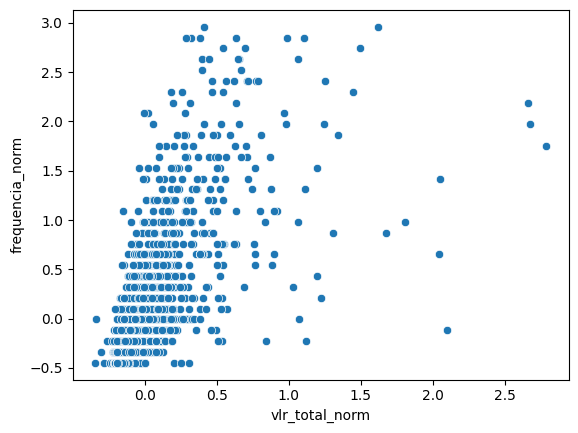

In [22]:
sns.scatterplot(df_train, x='vlr_total_norm', y='frequencia_norm')

Como removemos amostras _outliers_, há impacto na média e desvio padrão do dataset, consequentemente é necessário reajustar os _scalers_.

In [23]:
# Reajustando scaler
scaler = StandardScaler()
model_cols = ['vlr_total_norm', 'recencia_norm', 'frequencia_norm']
df_train[model_cols] = scaler.fit_transform(df_train[[c.replace('_norm', '') for c in model_cols]])

<Axes: xlabel='vlr_total_norm', ylabel='frequencia_norm'>

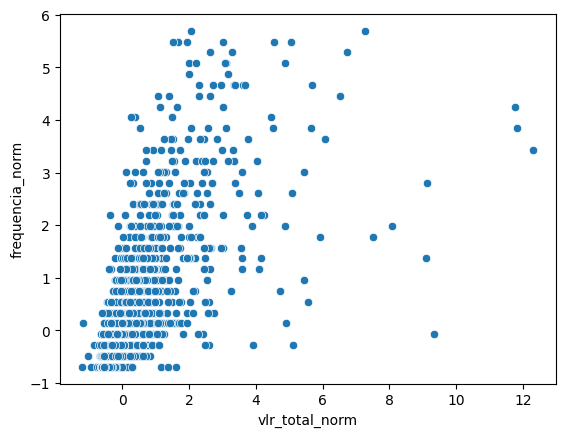

In [24]:
sns.scatterplot(df_train, x='vlr_total_norm', y='frequencia_norm')

In [25]:
from sklearn.cluster import KMeans
df_train.drop_duplicates(subset=model_cols, inplace=True)
# Ajustando k-means com k=1
kmeans = KMeans(n_clusters=1, verbose=2, n_init=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 13129.866914579776.
Iteration 1, inertia 9050.281903221523.
Converged at iteration 1: strict convergence.


KMeans(n_clusters=1, n_init=1, verbose=2)

In [26]:
# Ajustando k-means com k=2
kmeans = KMeans(n_clusters=2, verbose=2, n_init=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 7987.701368100941.
Iteration 1, inertia 6201.0928163363715.
Iteration 2, inertia 6192.910651218513.
Iteration 3, inertia 6191.2267568558555.
Iteration 4, inertia 6190.739675368232.
Iteration 5, inertia 6190.551597192074.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=2, n_init=1, verbose=2)

In [27]:
# Ajustando k-means com k=3
kmeans = KMeans(n_clusters=3, verbose=2, n_init=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 3487.465589537266.
Iteration 1, inertia 3168.247514707836.
Iteration 2, inertia 3162.8403145494876.
Iteration 3, inertia 3161.3871604505744.
Iteration 4, inertia 3160.287763863994.
Iteration 5, inertia 3159.104727165475.
Iteration 6, inertia 3158.7742881218637.
Iteration 7, inertia 3158.1447673963503.
Iteration 8, inertia 3157.7019447415887.
Iteration 9, inertia 3157.532212147584.
Converged at iteration 9: center shift 5.917591370999528e-05 within tolerance 0.00010002521997371214.


KMeans(n_clusters=3, n_init=1, verbose=2)

In [28]:
# Ajustando k-means com k=4
kmeans = KMeans(n_clusters=4, verbose=2, n_init=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 2922.319569985379.
Iteration 1, inertia 2342.906284927448.
Iteration 2, inertia 2313.307848901696.
Iteration 3, inertia 2303.9039840068053.
Iteration 4, inertia 2302.9011666955157.
Iteration 5, inertia 2302.6626550979026.
Converged at iteration 5: center shift 1.9063316302931394e-05 within tolerance 0.00010002521997371214.


KMeans(n_clusters=4, n_init=1, verbose=2)

In [29]:
# Ajustando k-means com k=5
kmeans = KMeans(n_clusters=5, verbose=2, n_init=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 2992.3247700130537.
Iteration 1, inertia 2029.3341364516277.
Iteration 2, inertia 1922.193555761081.
Iteration 3, inertia 1900.5576229385695.
Iteration 4, inertia 1892.5619935362736.
Iteration 5, inertia 1887.0335970147103.
Iteration 6, inertia 1885.2138988106344.
Iteration 7, inertia 1884.3463865436802.
Iteration 8, inertia 1883.582054527691.
Iteration 9, inertia 1882.9738066782324.
Iteration 10, inertia 1882.9041048755716.
Iteration 11, inertia 1882.6654054979588.
Iteration 12, inertia 1881.1584451471394.
Iteration 13, inertia 1879.5206920313742.
Iteration 14, inertia 1879.1529614687063.
Iteration 15, inertia 1879.0081814495898.
Iteration 16, inertia 1878.9001704217608.
Converged at iteration 16: center shift 2.608019744391845e-06 within tolerance 0.00010002521997371214.


KMeans(n_clusters=5, n_init=1, verbose=2)

Podemos observar que a inércia só diminui conforme aumentamos o valor de $k$. Na verdade, a inércia converge para $0$ na medida que $k$ converge pra quantidade de amostras $n$. Por quê isso acontece? Assumindo que estamos inicializando a posição dos centroides como amostras do dataset, como é o comportamento do algoritmo quando temos o número de clusters $k$ igual à quantidade de amostras $n$?

Vamos ver em prática:

In [30]:
# Ajustando k-means com k=n
kmeans = KMeans(n_clusters=df_train.shape[0], verbose=2, n_init=1, max_iter=1)
kmeans.fit(df_train[model_cols])

Initialization complete
Iteration 0, inertia 0.0.
Converged at iteration 0: center shift 0.0 within tolerance 0.00010002521997371214.


KMeans(max_iter=1, n_clusters=3016, n_init=1, verbose=2)

Agora que vimos que a inércia (variância intra-cluster) diminui conforme aumentamos $k$, sabemos que não faz sentido tomarmos um $k$ arbitrariamente grande. Conforme aumentamos $k$ começando em $k=1$, a variância diminui - mas ela diminui por igual a cada unidade a mais no $k$?

Podemos ajustar um K-Means para cada valor de $k$ e comparar a inércia final:

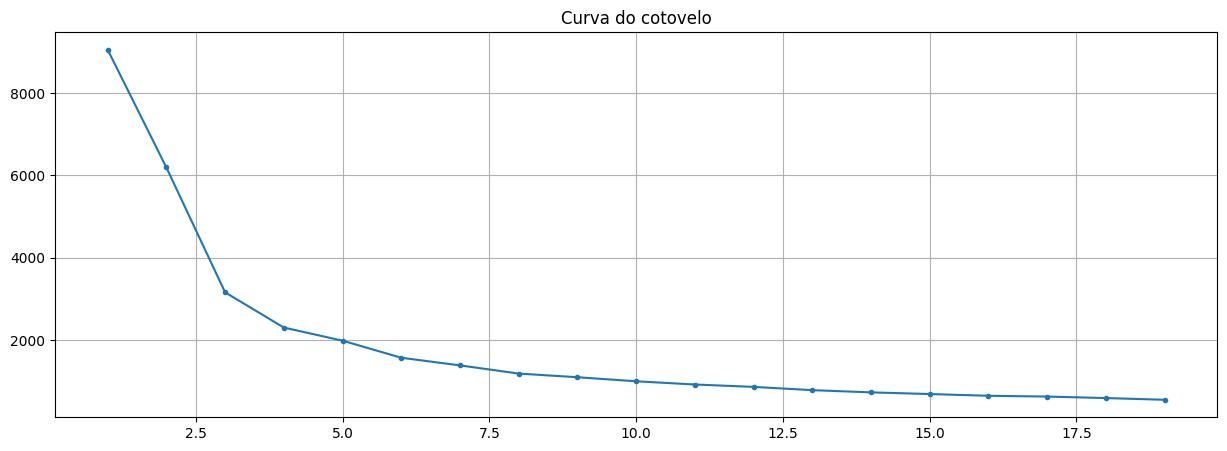

In [31]:
inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_train[model_cols])
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), inertias, marker='.')
plt.grid(True)
plt.title('Curva do cotovelo');

Note que a curva decresce rapidamente até $k=3$, e após isso tem um decrescimento menos acentuado. Podemos definir a quantidade de clusters utilizando esse gráfico, tomando $k$ como o ponto de inflexão da curva, seu "cotovelo" - daí o nome: método do cotovelo. Neste caso temos $k=3$, mas poderíamos assumir $k=4$ também por exemplo. A "resposta correta" depende das métricas _descritivas_ dos clusters, calculadas após inferência, e normalmente está fortemente associada à necessidade de negócios.

Vamos ajustar um K-Means com $k=3$ por fim:

In [32]:
# Ajustando k-means final com k=3
kmeans = KMeans(n_clusters=3, verbose=0, n_init=30)
kmeans.fit(df_train[model_cols])

KMeans(n_clusters=3, n_init=30)

In [33]:
# Scorando conjunto de treino
df_train['cluster'] = kmeans.predict(df_train[model_cols])
df_train.groupby('cluster').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.mean,
                                'recencia':np.mean,
                                'frequencia':np.mean}).sort_values(by='vlr_total').style.bar()

,CustomerID,vlr_total,recencia,frequencia
cluster,,,,
1,736,399.824334,246.914402,1.781250
0,2034,1084.775508,43.919371,3.775320
2,246,6591.313374,18.443089,16.987805


In [34]:
# Scorando conjunto de teste
# Scaler
scaler = StandardScaler()
df_test[model_cols] = scaler.fit_transform(df_test[[c.replace('_norm', '') for c in model_cols]])
df_test['cluster'] = kmeans.predict(df_test[model_cols])
df_test.groupby('cluster').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.mean,
                                'recencia':np.mean,
                                'frequencia':np.mean}).sort_values(by='CustomerID').style.bar()

,CustomerID,vlr_total,recencia,frequencia
cluster,,,,
2,42,18800.720238,7.166667,39.000000
1,326,388.607549,253.555215,1.659509
0,944,1326.102256,41.269068,4.578390


In [35]:
df_test.groupby('cluster').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.sum,
                                'recencia':np.sum,
                                'frequencia':np.sum}).sort_values(by='CustomerID').style.bar()

,CustomerID,vlr_total,recencia,frequencia
cluster,,,,
2,42,789630.250000,301,1638
1,326,126686.061000,82659,541
0,944,1251840.530000,38958,4322


In [36]:
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data_compra,qtd_dias_ultima_compra,vlr_total
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,373,15.30
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,373,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,373,22.00


As distribuições das variáveis descritivas no conjunto de teste ficaram muito parecidas com as do conjunto de treino. Isso é um indício de que o ajuste do modelo está fazendo sentido. Neste caso, temos 3 clusters com características bem distintas: um grupo de clientes que compraram somente uma ou duas vezes no passado, um grupo de clientes com compras mais recentes e valor um pouco maior, e um grupo de 42 clientes (conjunto de teste) com ticket médio de 18800 e alta recorrência de compras. É muito comum em negócios (e consequentemente em problemas de machine learning) que existam "amostras mais relevantes" - neste caso, um percentual muito pequeno da base de clientes ($\frac{42}{1312}\approx 3.2\%$) é responsável pela maior parte da receita ($\frac{789}{2166}\approx 36.4\%$).

As variáveis do dataset podem ser trabalhadas (feature engineering) para construção de novas variáveis tanto explicativas para entrar no modelo quanto descritivas pra caracterizar os clusters que saem. Um exemplo é a coluna "Description", que pode ser utilizada para agrupar os clientes com base no tipo de produto adquirido - mas antes seria necessário aplicar técnicas de processamento de linguagem natural na coluna. As compras também podem ser vistas como uma série temporal dado que temos a coluna de data, logo podemos calcular estatísticas como médias móveis e tempo médio de recorrência, visando separar os clientes também pela periodicidade das compras, não só a frequência na janela de 1 ano como fizemos.

#### Silhueta
A métrica da silhueta (_silhouette score_) nos permite analisar a qualidade do ajuste de um modelo de clusterização. Esta métrica é definida como a média de
<br><br>
$$\large\frac{(b - a)}{max(a, b)}$$
<br>
sobre todas as amostras, onde $a$ é a distância média intra-cluster e $b$ é a distância até da amostra até o cluster mais próximo que a amostra não faz parte. Essa medida nos dá uma ideia sobre a dispersão das amostras em relação à proximidade a outros clusters e possui imagem de $-1$ até $1$, onde $1$ é o melhor valor. Valores de silhueta negativos normalmente significam que existem pontos "atribuídos ao cluster errado", isto é, existem pontos que são mais similares a clusters próximos do que ao cluster que foi atribuído. Vamos calculá-la para nosso K-Means ajustado:

In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(df_train[model_cols], kmeans.fit_predict(df_train[model_cols]))

0.5161995609255229

#### DBSCAN
Agora, vamos utilizar uma abordagem diferente para clusterizar: ao invés de particionar o espaço como um todo, vamos agrupar amostras baseado em uma distância mínima ($\epsilon$) e definir clusters baseado numa quantidade mínima de amostras (_MinPts_) utilizando o DBSCAN - _Density Based Spatial Clustering of Applications with Noise_. Este algoritmo tem um funcionamento bastante simples mas pode ser muito custoso de ser ajustado devido à necessidade de múltiplos cálculos de distância e consequente maior complexidade computacional.

<br><div>
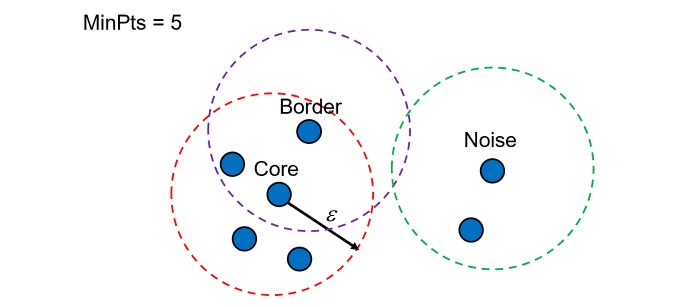
</div><br>

Para cada ponto $x$ do dataset, diremos que ele é um ponto _central_ (_core point_) se tiver pelo menos _MinPts_ amostras a no máximo $\epsilon$ de distância do ponto. Caso $x$ não seja um _core point_ mas esteja na $\epsilon$-vizinhança de algum, diremos que é um _ponto de borda_ (_border point_). Caso contrário, $x$ é um outlier e não pertence a nenhum cluster.

Esta é uma distinção importante: no K-Means, todo ponto pertence a somente 1 cluster. No DBSCAN, um ponto pode não pertencer a nenhum cluster, mas pertence a no máximo 1. Existem outros algoritmos (como Gaussian Mixture Models) que permitem que um ponto pertença a múltiplos clusters simultaneamente; estes algoritmos são chamados de _soft clustering_.

No caso do DBSCAN não temos um objeto _fittado_ que pode ser usado para predições futuras devido ao comportamento não-determinístico do modelo. Suponha dois _core points_ $x_{1}$ e $x_{2}$ separados por uma distância de $1.2\cdot\epsilon$, e um terceiro ponto $x_{3}$ exatamente no meio. A qual cluster $x_{3}$ pertence?

Vamos aplicar o DBSCAN no nosso dataset de treino:

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
df_train['cluster2'] = dbscan.fit_predict(df_train[model_cols])

In [39]:
# Qtd de clusters formados
df_train['cluster2'].nunique()

13

In [40]:
# Análise descritiva
# O cluster -1 representa outliers
df_dbscan = df_train.query('cluster2!=-1')
print('Silhueta:',silhouette_score(df_dbscan[model_cols], df_dbscan['cluster2']))
df_train.query('cluster2 != -1').groupby('cluster2').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.mean,
                                'recencia':np.mean,
                                'frequencia':np.mean}).sort_values(by='vlr_total').style.bar()

Silhueta: -0.19751020239589664


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,877,283.284460,153.041049,1.000000
9,11,305.880909,361.454545,2.000000
0,525,478.728952,99.756190,2.000000
3,312,729.093337,68.250000,3.000000
11,10,747.298000,92.200000,5.000000
2,216,966.128380,35.157407,4.000000
5,150,1293.906140,26.973333,5.000000
7,92,1580.304891,24.108696,6.000000
4,60,1794.732333,17.816667,7.000000


Podemos ver que conseguimos uma ordenação bem razoável. Vamos modificar os hiperparâmetros `eps` e `min_pts` da técnica e analisar os resultados:

In [41]:
from sklearn.cluster import DBSCAN
from IPython.display import display

# Modificando epsilon
for epsilon in [0.05, 0.1, 0.2, 0.3, 0.4]:
    dbscan = DBSCAN(eps=epsilon, min_samples=15)
    df_train['cluster2'] = dbscan.fit_predict(df_train[model_cols])
    outs = df_train.query('cluster2==-1').shape[0]
    print(f'Epsilon = {epsilon}, qtd de clusters:', df_train['cluster2'].nunique()-1)
    print(f'Total de outliers: {outs} ({(outs/df_train.shape[0]):.1%})')
    print('Silhueta:',silhouette_score(df_train[model_cols], df_train['cluster2']))
    display(df_train.query('cluster2 != -1').groupby('cluster2').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.mean,
                                'recencia':np.mean,
                                'frequencia':np.mean}).sort_values(by='vlr_total').style.bar())

Epsilon = 0.05, qtd de clusters: 6
Total de outliers: 2579 (85.5%)
Silhueta: -0.3666376713227126


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
4,18,139.564444,170.777778,1.000000
5,15,149.041333,322.000000,1.000000
1,26,165.876538,263.961538,1.000000
0,42,173.476429,368.190476,1.000000
2,260,236.633385,36.265385,1.000000
3,76,333.772763,15.723684,2.000000


Epsilon = 0.1, qtd de clusters: 8
Total de outliers: 1611 (53.4%)
Silhueta: -0.35831703542628857


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
2,72,183.979722,364.777778,1.000000
1,746,251.297924,132.243968,1.000000
7,15,335.944000,170.466667,2.000000
0,274,440.395146,32.729927,2.000000
4,122,647.623115,18.795082,3.000000
3,122,815.035082,15.418033,4.000000
5,40,916.516750,15.375000,5.000000
6,14,1426.209286,13.142857,5.000000


Epsilon = 0.2, qtd de clusters: 11
Total de outliers: 816 (27.1%)
Silhueta: -0.2913836615887312


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,874,280.252347,153.056064,1.000000
0,517,466.616518,98.516441,2.000000
7,47,502.835532,167.319149,3.000000
3,238,755.543786,37.546218,3.000000
2,204,935.737598,31.661765,4.000000
5,140,1254.806721,25.735714,5.000000
4,38,1361.498684,17.105263,7.000000
8,78,1511.573333,19.269231,6.000000
9,15,2162.770667,10.533333,9.000000


Epsilon = 0.3, qtd de clusters: 1
Total de outliers: 326 (10.8%)
Silhueta: 0.5396704990884662


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
0,2690,859.537845,95.398513,3.244238


Epsilon = 0.4, qtd de clusters: 1
Total de outliers: 227 (7.5%)
Silhueta: 0.5947188973464991


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
0,2789,934.679883,94.565436,3.473646


In [42]:
from sklearn.cluster import DBSCAN
from IPython.display import display

# Modificando min_pts
for min_pts in [3, 5, 10, 15, 20, 30]:
    dbscan = DBSCAN(eps=0.2, min_samples=min_pts)
    df_train['cluster2'] = dbscan.fit_predict(df_train[model_cols])
    outs = df_train.query('cluster2==-1').shape[0]
    print(f'Min_samples = {min_pts}, qtd de clusters:', df_train['cluster2'].nunique()-1)
    print(f'Total de outliers: {outs} ({(outs/df_train.shape[0]):.1%})')
    print('Silhueta:',silhouette_score(df_train[model_cols], df_train['cluster2']))
    display(df_train.query('cluster2 != -1').groupby('cluster2').agg({'CustomerID':lambda x: len(set(x)),
                                'vlr_total':np.mean,
                                'recencia':np.mean,
                                'frequencia':np.mean}).sort_values(by='vlr_total').style.bar())

Min_samples = 3, qtd de clusters: 44
Total de outliers: 312 (10.3%)
Silhueta: -0.25827651886619485


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,888,301.342220,152.081081,1.000000
39,4,339.992500,246.500000,4.000000
0,544,488.747004,106.488971,2.000000
18,4,624.905000,136.000000,5.000000
38,3,739.076667,185.000000,6.000000
5,331,770.697344,73.782477,3.000000
31,7,773.148571,185.000000,5.000000
4,254,985.623661,54.137795,4.000000
21,4,1343.332500,8.500000,12.000000


Min_samples = 5, qtd de clusters: 28
Total de outliers: 440 (14.6%)
Silhueta: -0.3052566833817981


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,881,289.525086,152.645857,1.000000
14,6,403.876667,293.833333,3.000000
0,540,481.011296,106.077778,2.000000
8,24,666.437083,185.166667,4.000000
5,320,752.551972,69.100000,3.000000
25,5,830.996000,183.000000,5.000000
4,226,993.828407,39.393805,4.000000
7,176,1329.235460,36.062500,5.000000
10,99,1655.922828,26.414141,6.000000


Min_samples = 10, qtd de clusters: 12
Total de outliers: 680 (22.5%)
Silhueta: -0.26129584014337903


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,877,283.284460,153.041049,1.000000
9,11,305.880909,361.454545,2.000000
0,525,478.728952,99.756190,2.000000
3,312,729.093337,68.250000,3.000000
11,10,747.298000,92.200000,5.000000
2,216,966.128380,35.157407,4.000000
5,150,1293.906140,26.973333,5.000000
7,92,1580.304891,24.108696,6.000000
4,60,1794.732333,17.816667,7.000000


Min_samples = 15, qtd de clusters: 11
Total de outliers: 816 (27.1%)
Silhueta: -0.2913836615887312


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,874,280.252347,153.056064,1.000000
0,517,466.616518,98.516441,2.000000
7,47,502.835532,167.319149,3.000000
3,238,755.543786,37.546218,3.000000
2,204,935.737598,31.661765,4.000000
5,140,1254.806721,25.735714,5.000000
4,38,1361.498684,17.105263,7.000000
8,78,1511.573333,19.269231,6.000000
9,15,2162.770667,10.533333,9.000000


Min_samples = 20, qtd de clusters: 9
Total de outliers: 960 (31.8%)
Silhueta: -0.3257771194129335


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,870,276.083231,153.036782,1.000000
8,27,279.271852,309.370370,2.000000
0,483,470.009896,84.838509,2.000000
6,37,513.111622,168.756757,3.000000
4,232,755.142677,35.900862,3.000000
2,177,913.726158,23.977401,4.000000
3,134,1236.961948,24.238806,5.000000
5,30,1285.930333,17.266667,7.000000
7,66,1395.381364,17.121212,6.000000


Min_samples = 30, qtd de clusters: 6
Total de outliers: 1203 (39.9%)
Silhueta: -0.19219223184860823


,CustomerID,vlr_total,recencia,frequencia
cluster2,,,,
1,869,275.027723,153.154200,1.000000
0,423,478.698203,64.042553,2.000000
4,221,722.481271,34.515837,3.000000
2,152,873.983882,18.625000,4.000000
5,31,1091.993226,19.096774,6.000000
3,117,1192.964453,21.521368,5.000000


## Redução de dimensionalidade
Uma outra forma de aprendizado de máquina não-supervisionado é a redução de dimensionalidade. Estas técnicas consistem em "trocar" variáveis por combinações específicas de variáveis de forma a capturar a informação em dimensões menores. Vamos estudar um pouco de uma técnica específica chamada PCA - _Principal Component Analysis_.

Imagine que estamos coletando dados sobre cachorros, especificamente seu peso e sua altura. Naturalmente, cães maiores têm altura **e** peso maiores. Será que conseguimos construir uma variável que capture essa noção de tamanho? Podemos imaginar que há uma forte correlação entre o peso e a altura da amostra, algo como a seguinte imagem:

<br><div>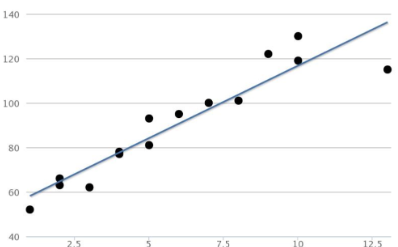</div><br>

Note que podemos definir uma nova _base_ para o espaço vetorial das variáveis explicativas; nesse caso, um espaço de 2 dimensões. Se escolhermos cuidadosamente os vetores dessa nova base, podemos concentrar a variação natural dos dados ao longo dos vetores da nova base (setas vermelhas no diagrama):
<br>

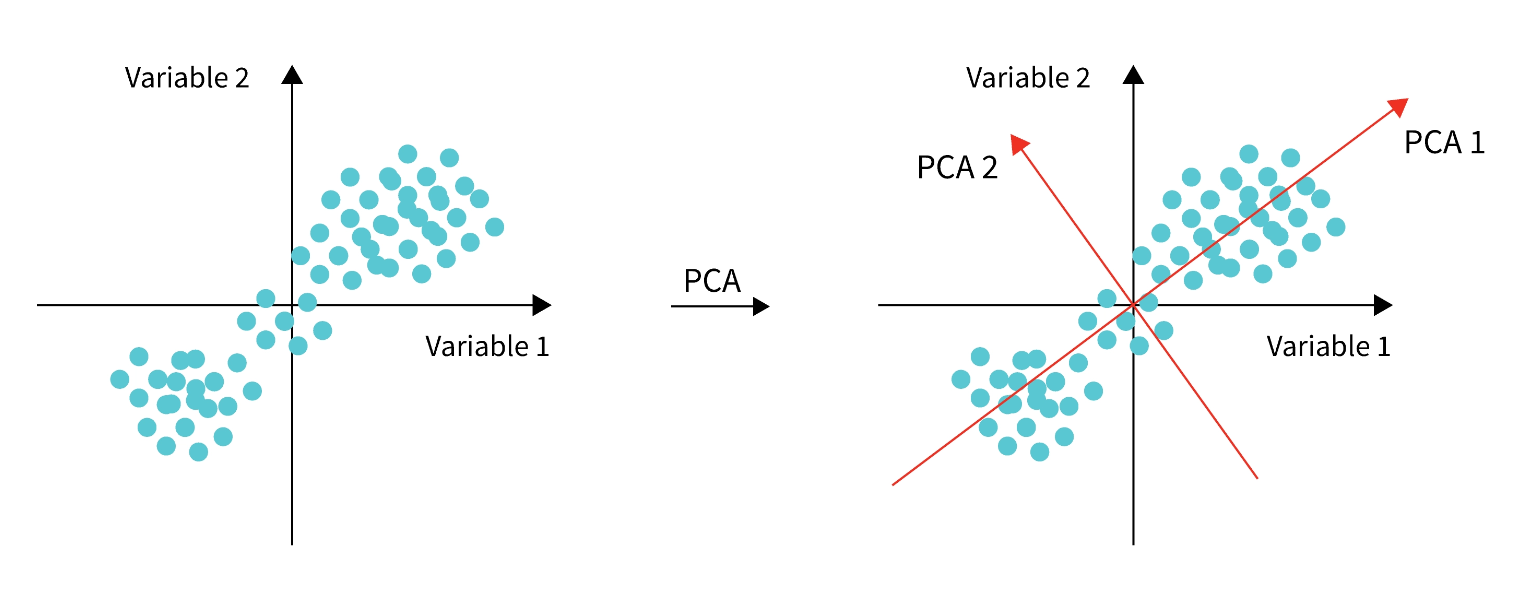
<br>

Esses vetores especiais que compõem a nova base são vetores de _máxima covariância_ do dataset. Covariância é uma estatística muito parecida com a correlação, mas que possui unidades de medida (a correlação é adimensional), e no caso do PCA, permite encontrar estes "vetores mágicos" através da matriz de covariância das variáveis. A covariância de uma variável com si mesmo é a variância. A heurística do modelo consiste em encontrar os **autovetores** da matriz de covariância e ordená-los pelo seu respectivo **autovalor**, que representa um percentual da variância do dataset explicada pelo autovetor.

Intuitivamente, o que estamos fazendo é uma mudança de base de forma a concentrar os eixos de maior variação dos dados nos vetores da base, de forma ordenada - do de maior concentração pro menor. Se fizermos uma mudança de base "completa" no espaço, obtendo a mesma quantidade de novos vetores (chamados _componentes principais_) que tínhamos de features, nada mudará: preservaremos 100% da informação do dataset. Caso usássemos somente a primeira componente principal, estaríamos reduzindo a dimensionalidade do dataset para $1$, efetivamente respondendo a pergunta: "qual o eixo que melhor representa sozinho a variação dos dados?".

No nosso exemplo de cachorros, teríamos no máximo 2 componentes principais, e a primeira delas (que captura a maior parte da variância do dataset) representaria, de forma abstrata, uma noção de "tamanho do cachorro" - efetivamente transformando peso e altura em uma só variável que representa esta medida. Ainda "sobraria" variância no dataset, que estaria por definição no vetor ortogonal à primeira componente principal; isto é, no "eixo que sobrou". Dessa forma, o PCA é amplamente utilizado para **reduzir a quantidade de variáveis preservando o máximo possível de informação**.

#### Maldição da dimensionalidade
Em modelos baseados em distância (como muitas técnicas de clustering), uma alta dimensionalidade (muitas variáveis) pode ser catastrófico. O motivo é o aumento geral das distâncias conforme se aumenta a quantidade de dimensões:
- 1 dimensão: $\vert x\vert$
- 2 dimensões: $\sqrt{x_{1}^2 + x_{2}^2}$
- 3 dimensões: $\sqrt{x_{1}^2 + x_{2}^2 + x_{3}^2}$
- 4 dimensões: $\sqrt{x_{1}^2 + x_{2}^2 + x_{3}^2 + x_{4}^2}$

De certa forma, é como se "tudo ficasse muito longe" conforme vamos aumentando a dimensionalidade. Este fenômeno é popularmente conhecido como a "maldição da dimensionalidade".
Em problemas que possuem alta dimensionalidade porém há multicolinearidade (variáveis com comportamentos dependentes), a aplicação de uma técnica de redução de dimensionalidade como o PCA viabiliza o treinamento de diversos algoritmos de machine learning, como os de clusterização.

Em contrapartida, a nova base do espaço vetorial é completamente abstrata, e não podemos interpretá-la como poderíamos fazer com as variáveis "puras", verificando por exemplo a _feature importance_ no modelo (coeficientes no caso da regressão linear e logística).
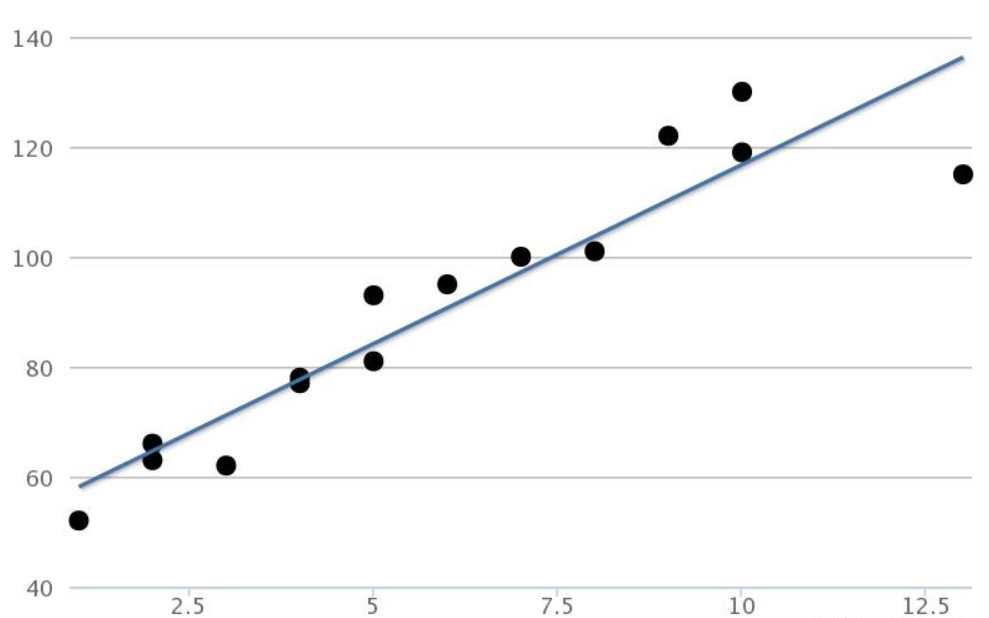

## Exercícios
- Utilizando o dataset Iris, visto na primeira aula, implemente uma técnica de clusterização para separar as três espécies da flor. Note que nesse caso estamos resolvendo um problema em que há variável resposta porém estamos utilizando técnicas não-supervisionadas. Após o ajuste do modelo em 3 clusters (sabemos de antemão que são 3 espécies diferentes), avalie seu desempenho como se fosse um modelo de classificação: qual a acurácia geral? E a ROC-AUC?
- Utilizando o dataset _Wine Quality_ visto na aula 03, ajuste um PCA de 4 componentes principais e calcule o percentual da variância explicada pelos 4 componentes. Treine um algoritmo para resolver o problema usando as 4 componentes principais encontradas. Escolha a técnica que preferir e compare o desempenho desta ajustada sobre o dataset "normal" e sobre o dataset de dimensionalidade reduzida. Note que este problema também pode ser visto como um problema de classificação, onde cada nota é uma classe separada.

Documentação do PCA:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Note o parâmetro `n_components` na inicialização e o atributo `explained_variance_ratio_` após o ajuste.